<a href="https://colab.research.google.com/github/ChanwonJung/ROKEY_team6_study/blob/main/SojeongLim/0306study_ch09_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9장 CNN을 활용한 이미지 인식

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

### GPU 확인하기

In [ ]:
# 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## 9.3 CNN의 처리 개요

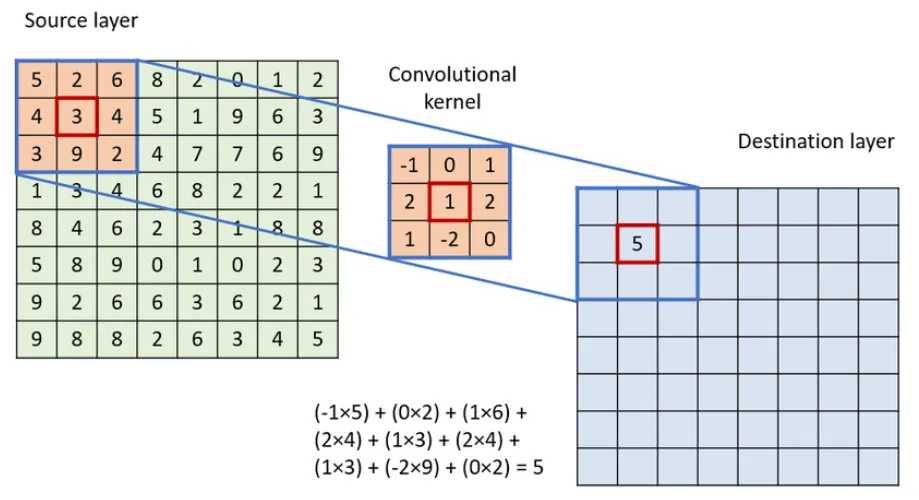

In [ ]:
data_root = './data'

# 샘플 손글씨 숫자 데이터 가져오기
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_set = datasets.MNIST(
    root = data_root,  train = True,
    download = True, transform = transform)

image, label = train_set[0]
image = image.view(1,1,28,28)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 431kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.22MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.56MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 대각선상에만 가중치를 갖는 특수한 합성곱 함수를 만듦
conv1 = nn.Conv2d(1, 1, 3)

# bias를 0으로
nn.init.constant_(conv1.bias, 0.0)

# weight를 특수한 값으로
w1_np = np.array([[0,0,1],[0,1,0],[1,0,0]])
w1 = torch.tensor(w1_np).float()
w1 = w1.view(1,1,3,3)
conv1.weight.data = w1

In [ ]:
# 손글씨 숫자에 3번 합성곱 처리를 함
image, label = train_set[0]
image = image.view(1,1,28,28)
w1 = conv1(image)
w2 = conv1(w1)
w3 = conv1(w2)
images = [image, w1, w2, w3]

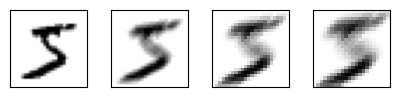

In [ ]:
# 결과 화면 출력

plt.figure(figsize=(5, 1))
for i in range(4):
    size = 28 - i*2
    ax = plt.subplot(1, 4, i+1)
    img = images[i].data.numpy()
    plt.imshow(img.reshape(size, size),cmap='gray_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 9.4 파이토치에서 CNN을 구현하는 방법

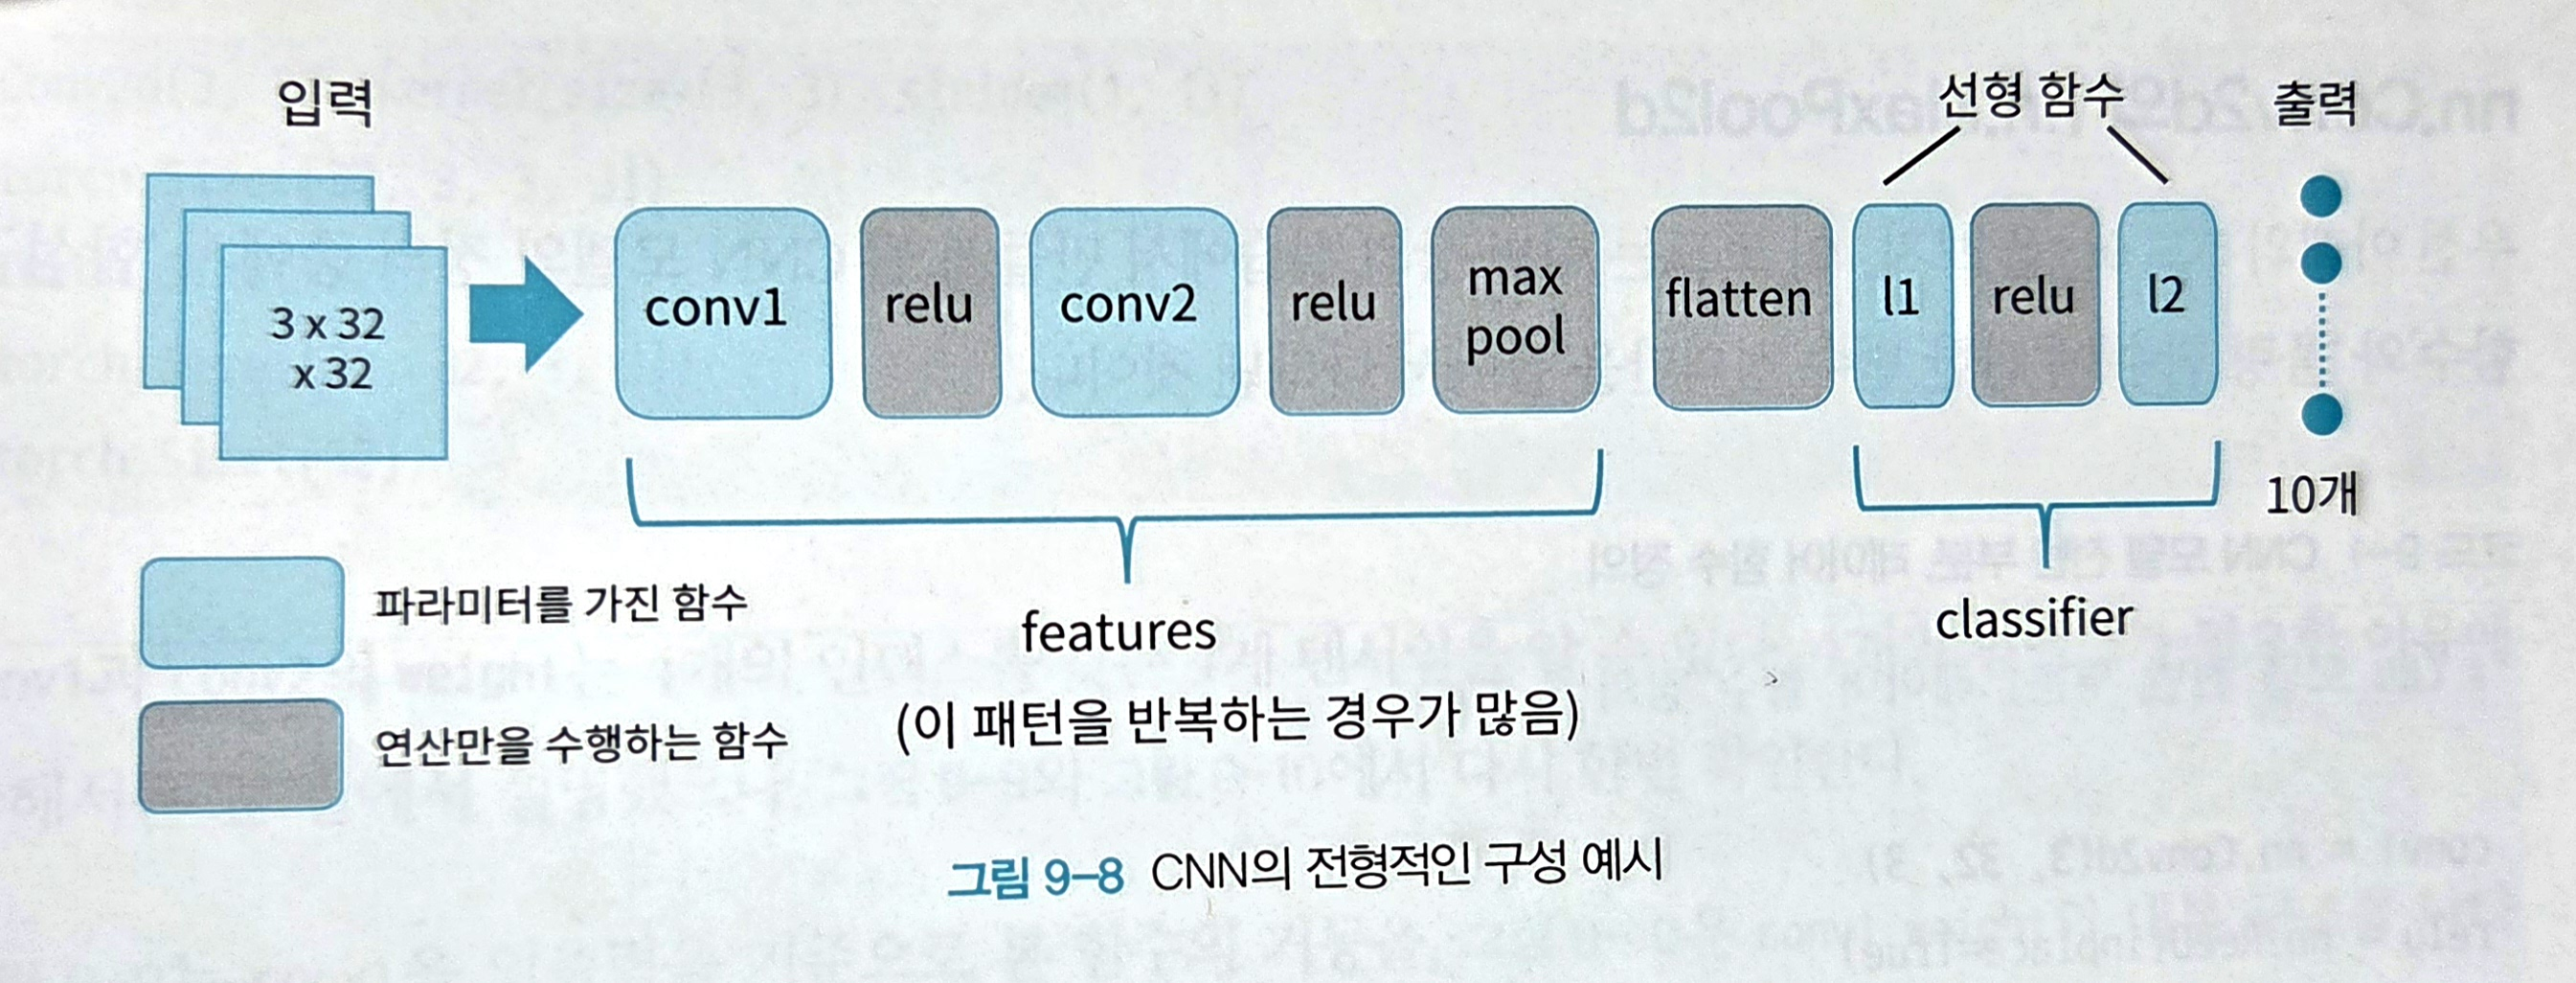

### nn.Conv2d 와 nn.MaxPool2d

In [ ]:
# CNN 모델 전반 부분, 레이어 함수 정의

conv1 = nn.Conv2d(3, 32, 3)     #(입력 채널 수, 출력 채널 수, 커널 사이즈)
relu = nn.ReLU(inplace=True)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2,2))      #(풀링 사각형의 가로, 세로 화소 수)

In [ ]:
# conv1 확인
print(conv1)                             #Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))

# conv1 내부 변수의 shape 확인
print(conv1.weight.shape)                 #torch.Size([32, 3, 3, 3]) (출력,입력 채널 수, 커널 가로,세로)
print(conv1.bias.shape)                   #torch.Size([32])

# conv2 내부 변수의 shape 확인
print(conv2.weight.shape)                #torch.Size([32, 32, 3, 3])
print(conv2.bias.shape)                  #torch.Size([32])

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32, 32, 3, 3])
torch.Size([32])


In [ ]:
# conv1의 weight[0]는 0번째 출력 채널의 가중치
w = conv1.weight[0]

# weight[0]의 shape과 값 확인
print(w.shape)
print(w.data.numpy())

torch.Size([3, 3, 3])
[[[ 0.0503 -0.0928  0.0268]
  [-0.1336  0.0696 -0.0428]
  [-0.0345 -0.0986  0.1384]]

 [[ 0.068  -0.1077  0.1445]
  [ 0.05   -0.1011 -0.1524]
  [ 0.0554  0.0653 -0.1227]]

 [[ 0.0782  0.115  -0.0414]
  [-0.1852 -0.1177 -0.0175]
  [-0.0793 -0.0492 -0.1007]]]


In [ ]:
# 더미로 입력과 같은 사이즈를 갖는 텐서를 생성
inputs = torch.randn(100, 3, 32, 32)            #이제 shape변화 살펴보기!
print(inputs.shape)

torch.Size([100, 3, 32, 32])


In [ ]:
# CNN 전반부 처리 시뮬레이션

x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)        #작은 사각형 2x2

In [ ]:
# 각 변수의 shape 확인 (데이터 건수, 채널수, 화소 가로, 세로)

print(inputs.shape)      #torch.Size([100, 3, 32, 32])
print(x1.shape)          #torch.Size([100, 32, 30, 30])   커널 사이즈 3x3이므로 화소 수 가로, 세로 2씩 줄어듦.
print(x2.shape)          #torch.Size([100, 32, 30, 30])
print(x3.shape)          #torch.Size([100, 32, 28, 28])
print(x4.shape)          #torch.Size([100, 32, 28, 28])
print(x5.shape)          #torch.Size([100, 32, 14, 14])  풀링 사각형 2x2는 겹치지 않고 이동하므

torch.Size([100, 3, 32, 32])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 14, 14])


### nn.Sequential

파이토치에서 '컨테이너'라고 불리는 클래스 중 하나임

In [ ]:
# 함수로 정의
features = nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

In [ ]:
# 동작 테스트
outputs = features(inputs)

# 결과 확인
print(outputs.shape)

torch.Size([100, 32, 14, 14])


### nn.Flatten
3계 텐서를 선형 함수(nn.Linear)에서 사용할 수 있도록 1계 텐서로 형태 변환

In [ ]:
# 함수 정의
flatten = nn.Flatten()

# 동작 테스트
outputs2 = flatten(outputs)

# 결과 확인: 4계->2계(한 건의 데이터에 대해서는 3계->1계)
print(outputs.shape)
print(outputs2.shape)

torch.Size([100, 32, 14, 14])
torch.Size([100, 6272])


## 9.5 공통 함수 사용하기

### eval_loss(손실 계산)

In [ ]:
# 손실 계산용
def eval_loss(loader, device, net, criterion):

    # 데이터로더에서 처음 한 개 세트를 가져옴
    for images, labels in loader:
        break

    # 디바이스 할당
    inputs = images.to(device)
    labels = labels.to(device)

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    return loss

### fit(학습)


- '학습'처리 담당  
- 반복 계산 부분을 함수로 정의하여 한 번에 처리  
- 함수 호출 시 8개의 인수 필요  
     net: 학습 대상의 모델 인스턴스  
     optimizer: 최적화 함수의 인스턴스  
     criterion: 손실 함수의 인스턴스  
     num_epoch: 반복 횟수  
     train_loader: 훈련용 데이터로더  
     test_loader: 검증용 데이터로더  
     device: GPU 또는 CPU  
     hIstory: 계산 도중의 history, 추가학습이 가능하게 함  

-  history(반복 횟수, 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도)로 반환

In [ ]:
# 학습용 함수
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdm 라이브러리 임포트
    from tqdm.notebook import tqdm

    base_epochs = len(history)

    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 훈련 페이즈
        net.train()          #다음 장의 nn.Dropout, nn.BatchNorm2d에서 어떤 페이즈(훈련/예측)인지 알려주는 처리 필요.
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 경사 초기화
            optimizer.zero_grad()

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 경사 계산
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            train_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            val_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count

        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

### eval_history(학습 로그)

- history 앞부분과 마지막 부분을 print해서 학습 결과의 개요 표시  
- 학습 곡선을 손실, 정확도 두 가지로 출력

In [ ]:
# 학습 로그 해석

def evaluate_history(history):
    # 손실과 정확도 확인
    print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}')
    print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 학습 곡선 출력(손실)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='훈련')
    plt.plot(history[:,0], history[:,3], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('손실')
    plt.title('학습 곡선(손실)')
    plt.legend()
    plt.show()

    # 학습 곡선 출력(정확도)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='훈련')
    plt.plot(history[:,0], history[:,4], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('정확도')
    plt.title('학습 곡선(정확도)')
    plt.legend()
    plt.show()

### show_images_labels(예측 결과 표시)

사전에 학습이 끝난 모델이 올바르게 예측하고 있는지, 원본 데이터의 이미지를 출력함과 동시에 수행.  
데이터 로더에서 가져온 첫 50건을 대상으로 모델을 만들기 전에 이미지와 정답 데이터(라벨)만 출력하는 것도 가능.  
- loader: 검증용 데이터  
- classes: 정답데이터에 대응하는 라벨 값의 리스트. ex) plane, car, bird
- net: 사전에 학습이 끝난 모델의 인스턴스. None을 넘기면 정답 데이터만 표시, 학습 전에 데이터 형태를 확인하고 싶은 경우 사용  
- device: 예측 계산에 사용하는 디바이스


In [ ]:
# 이미지와 라벨 표시
def show_images_labels(loader, classes, net, device):

    # 데이터로더에서 처음 1세트를 가져오기
    for images, labels in loader:
        break
    # 표시 수는 50개
    n_size = min(len(images), 50)

    if net is not None:
      # 디바이스 할당
      inputs = images.to(device)
      labels = labels.to(device)

      # 예측 계산
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 처음 n_size개 표시
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # net이 None이 아닌 경우는 예측 결과도 타이틀에 표시함
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 정답인지 아닌지 색으로 구분함
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # net이 None인 경우는 정답 라벨만 표시
        else:
          ax.set_title(label_name, fontsize=20)
        # 텐서를 넘파이로 변환
        image_np = images[i].numpy().copy()
        # 축의 순서 변경 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 값의 범위를[-1, 1] -> [0, 1]로 되돌림
        img = (img + 1)/2
        # 결과 표시
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()


### torch_seed(난수 초기화)

In [ ]:
# 파이토치 난수 고정
#동일한 결과를 얻기 위해 아래 두 줄 추가

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True


## 9.6 데이터 준비

In [ ]:
# Transforms의 정의

# transformer1 1계 텐서화      -> 전결합형 신경망에 사용

transform1 = transforms.Compose([
    transforms.ToTensor(),            #이미지를 PyTorch 텐서로 변환 (0~1 범위)
    transforms.Normalize(0.5, 0.5),   #정규화 (평균 0.5, 표준편차 0.5)
    transforms.Lambda(lambda x: x.view(-1)),  #1D 텐서(벡터)로 변환
])

# transformer2 정규화만 실시   -> CNN에 사용

# 검증 데이터용 : 정규화만 실시
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [ ]:
# 데이터 취득용 함수 datasets

data_root = './data'

# 훈련 데이터셋 (1계 텐서 버전)
train_set1 = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform1)

# 검증 데이터셋 (1계 텐서 버전)
test_set1 = datasets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = transform1)

# 훈련 데이터셋 (3계 텐서 버전)
train_set2 = datasets.CIFAR10(
    root =  data_root, train = True,
    download = True, transform = transform2)

# 검증 데이터셋 (3계 텐서 버전)
test_set2 = datasets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = transform2)

100%|██████████| 170M/170M [00:03<00:00, 43.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### 데이터셋 확인

In [ ]:
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


In [ ]:
# 데이터로더 정의

# 미니 배치 사이즈 지정
batch_size = 100

# 훈련용 데이터로더
# 훈련용이므로 셔플을 True로 설정
train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle=True)

# 검증용 데이터로더
# 검증용이므로 셔플하지 않음
test_loader1 = DataLoader(test_set1,  batch_size=batch_size, shuffle=False)

# 훈련용 데이터로더
# 훈련용이므로 셔플을 True로 설정
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

# 검증용 데이터로더
# 검증용이므로 셔플하지 않음
test_loader2 = DataLoader(test_set2,  batch_size=batch_size, shuffle=False)


In [ ]:
# train_loader1에서 한 세트 가져오기
for images1, labels1 in train_loader1:
    break

# train_loader2에서 한 세트 가져오기
for images2, labels2 in train_loader2:
    break

# 각 데이터의 shape 확인
print(images1.shape)
print(images2.shape)


torch.Size([100, 3072])
torch.Size([100, 3, 32, 32])


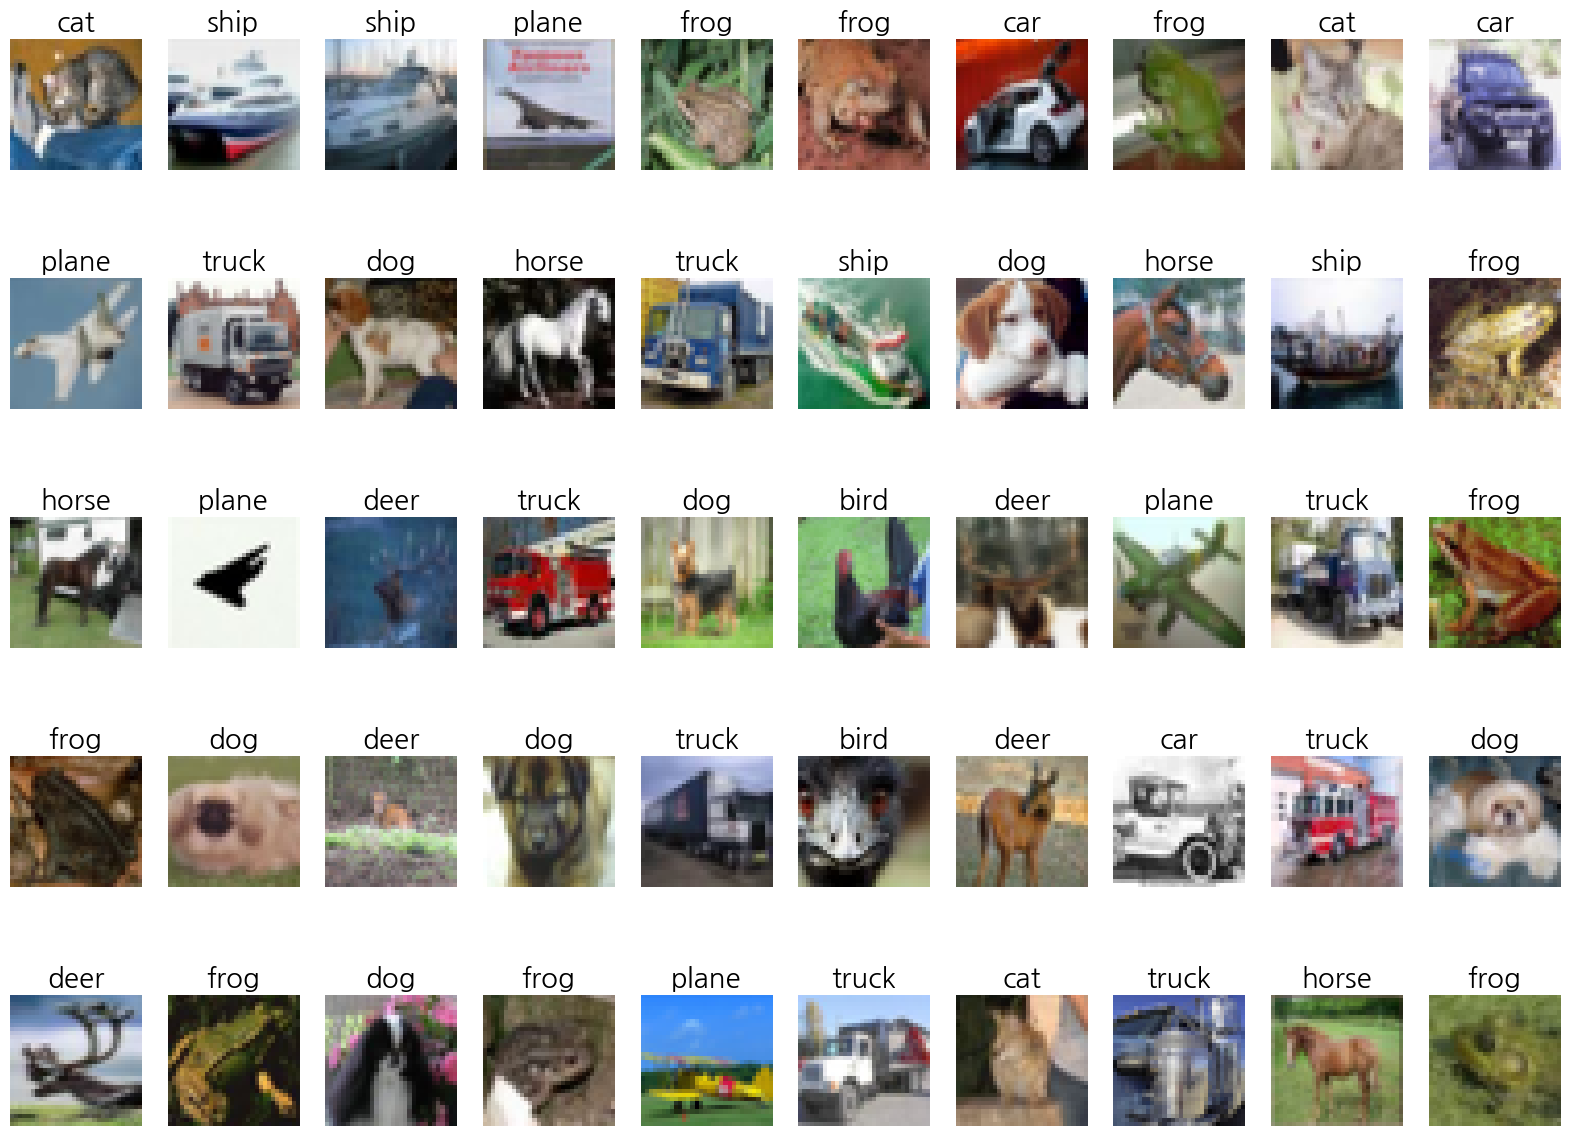

In [ ]:
# 정답 라벨 정의
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 검증 데이터의 처음 50개를 출력
show_images_labels(test_loader2, classes, None, None)

## 9.7 모델 정의(전결합형: fully connected network)

### 학습용 파라미터 설정

In [ ]:
# 입력 차원수는 3*32*32=3072
n_input = image1.view(-1).shape[0]

# 출력 차원수
# 분류 클래스의 수이므로　10
n_output = len(set(list(labels1.data.numpy())))

# 은닉층의 노드수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 3072  n_hidden: 128 n_output: 10


In [ ]:
# 모델 정의
# 3072입력 10출력 1은닉층을 포함한 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층의 노드수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층의 정의
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

### 모델 인스턴스 생성과 GPU 할당

In [ ]:
# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
# 모델 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=3072, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
# 모델 개요 표시 2

summary(net, (100,3072),depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 128]                393,344
├─ReLU: 1-2                              [100, 128]                --
├─Linear: 1-3                            [100, 10]                 1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 39.46
Input size (MB): 1.23
Forward/backward pass size (MB): 0.11
Params size (MB): 1.58
Estimated Total Size (MB): 2.92

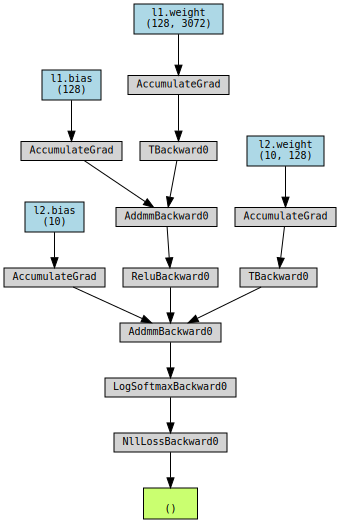

In [ ]:
# 손실 계산
loss = eval_loss(test_loader1, device, net, criterion)

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

## 9.8 결과(전결합형)

### 학습

In [ ]:
# 난수 초기화
torch_seed()

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50

# 평가 결과 기록
history = np.zeros((0,5))

# 학습
history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.01950 acc: 0.32200 val_loss: 0.01794, val_acc: 0.37670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01738 acc: 0.39572 val_loss: 0.01684, val_acc: 0.41710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.01655 acc: 0.42402 val_loss: 0.01622, val_acc: 0.43840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.01602 acc: 0.44248 val_loss: 0.01583, val_acc: 0.45120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.01563 acc: 0.45530 val_loss: 0.01553, val_acc: 0.46100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.01532 acc: 0.46754 val_loss: 0.01530, val_acc: 0.46890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.01505 acc: 0.47748 val_loss: 0.01512, val_acc: 0.47340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.01480 acc: 0.48604 val_loss: 0.01493, val_acc: 0.47770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.01457 acc: 0.49572 val_loss: 0.01480, val_acc: 0.48660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01435 acc: 0.50454 val_loss: 0.01463, val_acc: 0.49010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01413 acc: 0.51112 val_loss: 0.01450, val_acc: 0.49580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01394 acc: 0.52008 val_loss: 0.01437, val_acc: 0.50260


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01375 acc: 0.52678 val_loss: 0.01425, val_acc: 0.50590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.01357 acc: 0.53504 val_loss: 0.01423, val_acc: 0.50620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.01341 acc: 0.53924 val_loss: 0.01407, val_acc: 0.51360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.01324 acc: 0.54590 val_loss: 0.01402, val_acc: 0.51110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.01307 acc: 0.55108 val_loss: 0.01391, val_acc: 0.51370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.01293 acc: 0.55716 val_loss: 0.01388, val_acc: 0.51450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.01278 acc: 0.56146 val_loss: 0.01379, val_acc: 0.51960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.01264 acc: 0.56694 val_loss: 0.01380, val_acc: 0.51770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.01251 acc: 0.57062 val_loss: 0.01372, val_acc: 0.51810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.01237 acc: 0.57726 val_loss: 0.01368, val_acc: 0.52580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.01225 acc: 0.58008 val_loss: 0.01363, val_acc: 0.52750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.01213 acc: 0.58402 val_loss: 0.01355, val_acc: 0.52440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.01200 acc: 0.59174 val_loss: 0.01352, val_acc: 0.52750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.01189 acc: 0.59382 val_loss: 0.01351, val_acc: 0.52900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.01177 acc: 0.59886 val_loss: 0.01349, val_acc: 0.52720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.01167 acc: 0.60206 val_loss: 0.01343, val_acc: 0.52960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.01156 acc: 0.60540 val_loss: 0.01342, val_acc: 0.52840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.01145 acc: 0.60976 val_loss: 0.01346, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.01135 acc: 0.61516 val_loss: 0.01341, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.01124 acc: 0.61786 val_loss: 0.01338, val_acc: 0.52870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.01114 acc: 0.62116 val_loss: 0.01338, val_acc: 0.53070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.01105 acc: 0.62616 val_loss: 0.01342, val_acc: 0.52810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.01095 acc: 0.62846 val_loss: 0.01341, val_acc: 0.52730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.01086 acc: 0.63218 val_loss: 0.01334, val_acc: 0.53210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.01076 acc: 0.63564 val_loss: 0.01340, val_acc: 0.52820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.01067 acc: 0.63948 val_loss: 0.01336, val_acc: 0.53080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.01059 acc: 0.64206 val_loss: 0.01341, val_acc: 0.53010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.01050 acc: 0.64520 val_loss: 0.01348, val_acc: 0.52430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.01041 acc: 0.64904 val_loss: 0.01340, val_acc: 0.52840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.01033 acc: 0.65044 val_loss: 0.01347, val_acc: 0.52820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.01025 acc: 0.65418 val_loss: 0.01347, val_acc: 0.52500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.01016 acc: 0.65598 val_loss: 0.01346, val_acc: 0.52490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.01007 acc: 0.65942 val_loss: 0.01345, val_acc: 0.52630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.01000 acc: 0.66198 val_loss: 0.01344, val_acc: 0.53020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00993 acc: 0.66424 val_loss: 0.01347, val_acc: 0.52600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00984 acc: 0.66810 val_loss: 0.01351, val_acc: 0.52960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00977 acc: 0.67072 val_loss: 0.01363, val_acc: 0.52110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00970 acc: 0.67242 val_loss: 0.01353, val_acc: 0.53100


### 평가

초기상태 : 손실 : 0.01794  정확도 : 0.37670
최종상태 : 손실 : 0.01353  정확도 : 0.53100


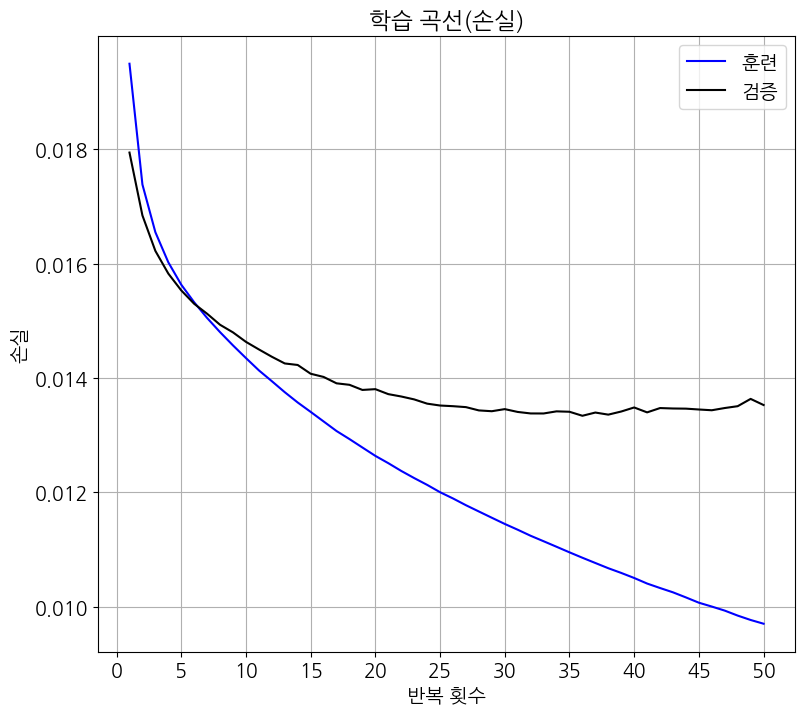

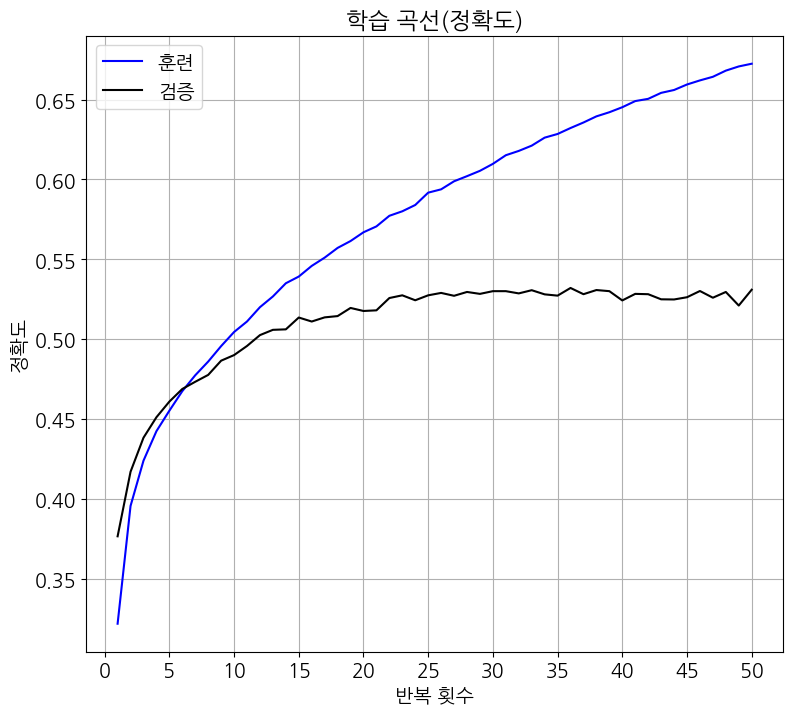

In [ ]:
# 평가

evaluate_history(history)

## 9.9 모델 정의(CNN)

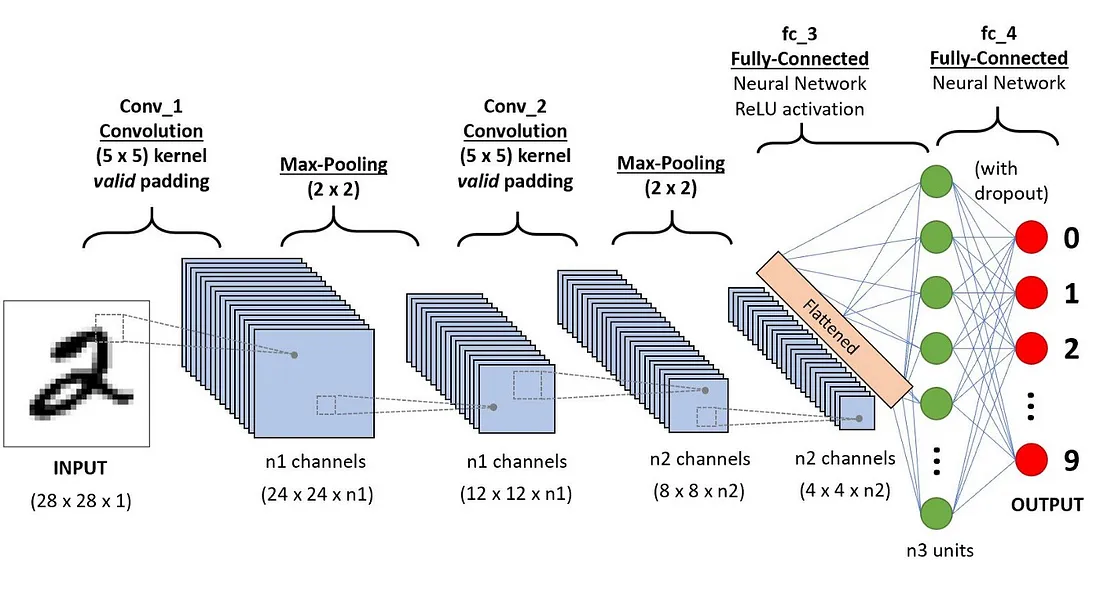

In [ ]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 32, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(6272, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool)

    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3

### 모델 인스턴스 생성

In [ ]:
# 모델 인스턴스 생성
net = CNN(n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
# 모델 개요 표시 1

print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=6272, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=6272, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 모델 개요 표시2

summary(net,(100,3,32,32),depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 32, 14, 14]         10,144
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Flatten: 1-6                           [100, 6272]               --
├─Sequential: 1-7                        [100, 10]                 804,234
Total params: 823,626
Trainable params: 823,626
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 886.11
Input size (MB): 1.23
Forward/backward pass size (MB): 43.22
Params size (MB): 3.26
Estimated Total Size (MB): 47.71

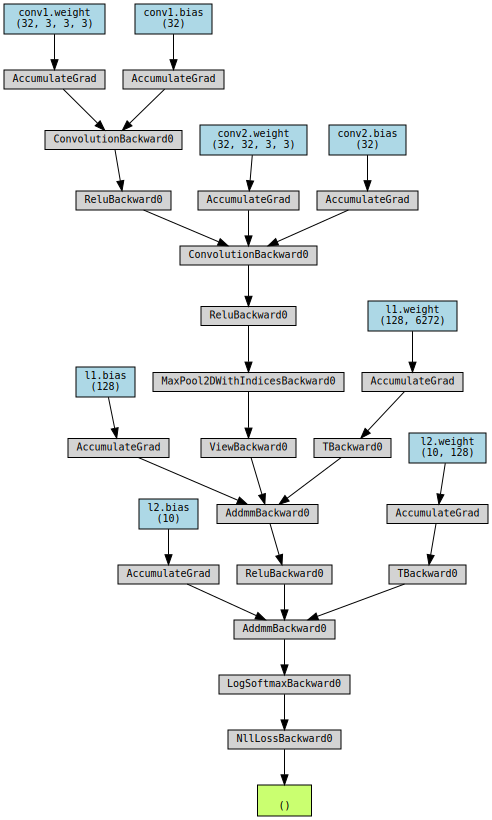

In [ ]:
# 손실 계산
loss = eval_loss(test_loader2, device, net, criterion)

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

## 9.10 결과(CNN)

### 학습

In [ ]:
# 난수 초기화
torch_seed()

# 모델 인스턴스 생성
net = CNN(n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50

# 평가 결과 기록
history2 = np.zeros((0,5))

# 학습
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.02082 acc: 0.26104 val_loss: 0.01866, val_acc: 0.34680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01781 acc: 0.37282 val_loss: 0.01677, val_acc: 0.40960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.01613 acc: 0.43034 val_loss: 0.01530, val_acc: 0.46020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.01485 acc: 0.47316 val_loss: 0.01450, val_acc: 0.48920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.01408 acc: 0.49958 val_loss: 0.01370, val_acc: 0.51190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.01350 acc: 0.52032 val_loss: 0.01333, val_acc: 0.52670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.01304 acc: 0.53648 val_loss: 0.01292, val_acc: 0.53810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.01253 acc: 0.55444 val_loss: 0.01255, val_acc: 0.55040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.01206 acc: 0.57406 val_loss: 0.01237, val_acc: 0.56150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01158 acc: 0.59128 val_loss: 0.01185, val_acc: 0.58130


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01116 acc: 0.60852 val_loss: 0.01164, val_acc: 0.58880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01078 acc: 0.62366 val_loss: 0.01172, val_acc: 0.58210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01036 acc: 0.63748 val_loss: 0.01112, val_acc: 0.60600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00997 acc: 0.65058 val_loss: 0.01089, val_acc: 0.61400


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00959 acc: 0.66442 val_loss: 0.01109, val_acc: 0.60420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00922 acc: 0.67736 val_loss: 0.01052, val_acc: 0.63310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00881 acc: 0.69292 val_loss: 0.01059, val_acc: 0.62680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00846 acc: 0.70416 val_loss: 0.01011, val_acc: 0.64970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00808 acc: 0.71932 val_loss: 0.01019, val_acc: 0.64220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00773 acc: 0.73156 val_loss: 0.01047, val_acc: 0.63290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00737 acc: 0.74306 val_loss: 0.01003, val_acc: 0.65560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00701 acc: 0.75794 val_loss: 0.01023, val_acc: 0.65170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00674 acc: 0.76642 val_loss: 0.00995, val_acc: 0.66050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00636 acc: 0.77964 val_loss: 0.01005, val_acc: 0.66190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00603 acc: 0.79354 val_loss: 0.01005, val_acc: 0.66770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00568 acc: 0.80552 val_loss: 0.01051, val_acc: 0.64770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00539 acc: 0.81632 val_loss: 0.01050, val_acc: 0.66360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00508 acc: 0.82704 val_loss: 0.01129, val_acc: 0.64340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00474 acc: 0.83938 val_loss: 0.01052, val_acc: 0.66780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00442 acc: 0.85192 val_loss: 0.01115, val_acc: 0.65470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00408 acc: 0.86310 val_loss: 0.01093, val_acc: 0.66650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00380 acc: 0.87168 val_loss: 0.01190, val_acc: 0.64340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00352 acc: 0.88442 val_loss: 0.01125, val_acc: 0.66860


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00324 acc: 0.89232 val_loss: 0.01221, val_acc: 0.65490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00294 acc: 0.90590 val_loss: 0.01265, val_acc: 0.65370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00273 acc: 0.91166 val_loss: 0.01259, val_acc: 0.65610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00241 acc: 0.92468 val_loss: 0.01288, val_acc: 0.65980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00215 acc: 0.93400 val_loss: 0.01329, val_acc: 0.66300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00196 acc: 0.94010 val_loss: 0.01368, val_acc: 0.66200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00173 acc: 0.95072 val_loss: 0.01447, val_acc: 0.65340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00147 acc: 0.95962 val_loss: 0.01567, val_acc: 0.65220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00130 acc: 0.96538 val_loss: 0.01554, val_acc: 0.65100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00106 acc: 0.97508 val_loss: 0.01562, val_acc: 0.66010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00102 acc: 0.97636 val_loss: 0.01586, val_acc: 0.66340


  0%|          | 0/500 [00:00<?, ?it/s]

### 평가

초기상태 : 손실 : 0.01866  정확도 : 0.34680
최종상태 : 손실 : 0.01887  정확도 : 0.66490


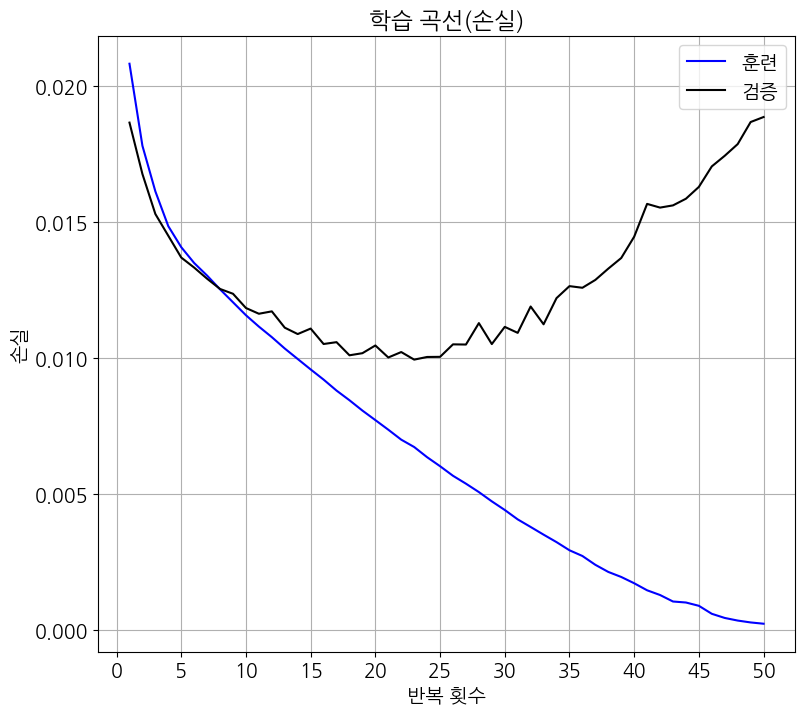

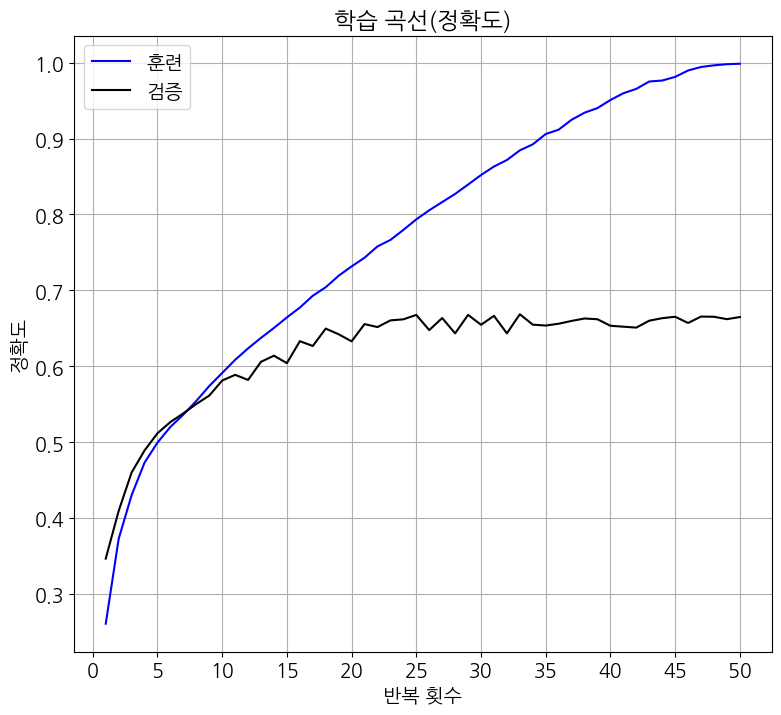

In [ ]:
# 평가

evaluate_history(history2)

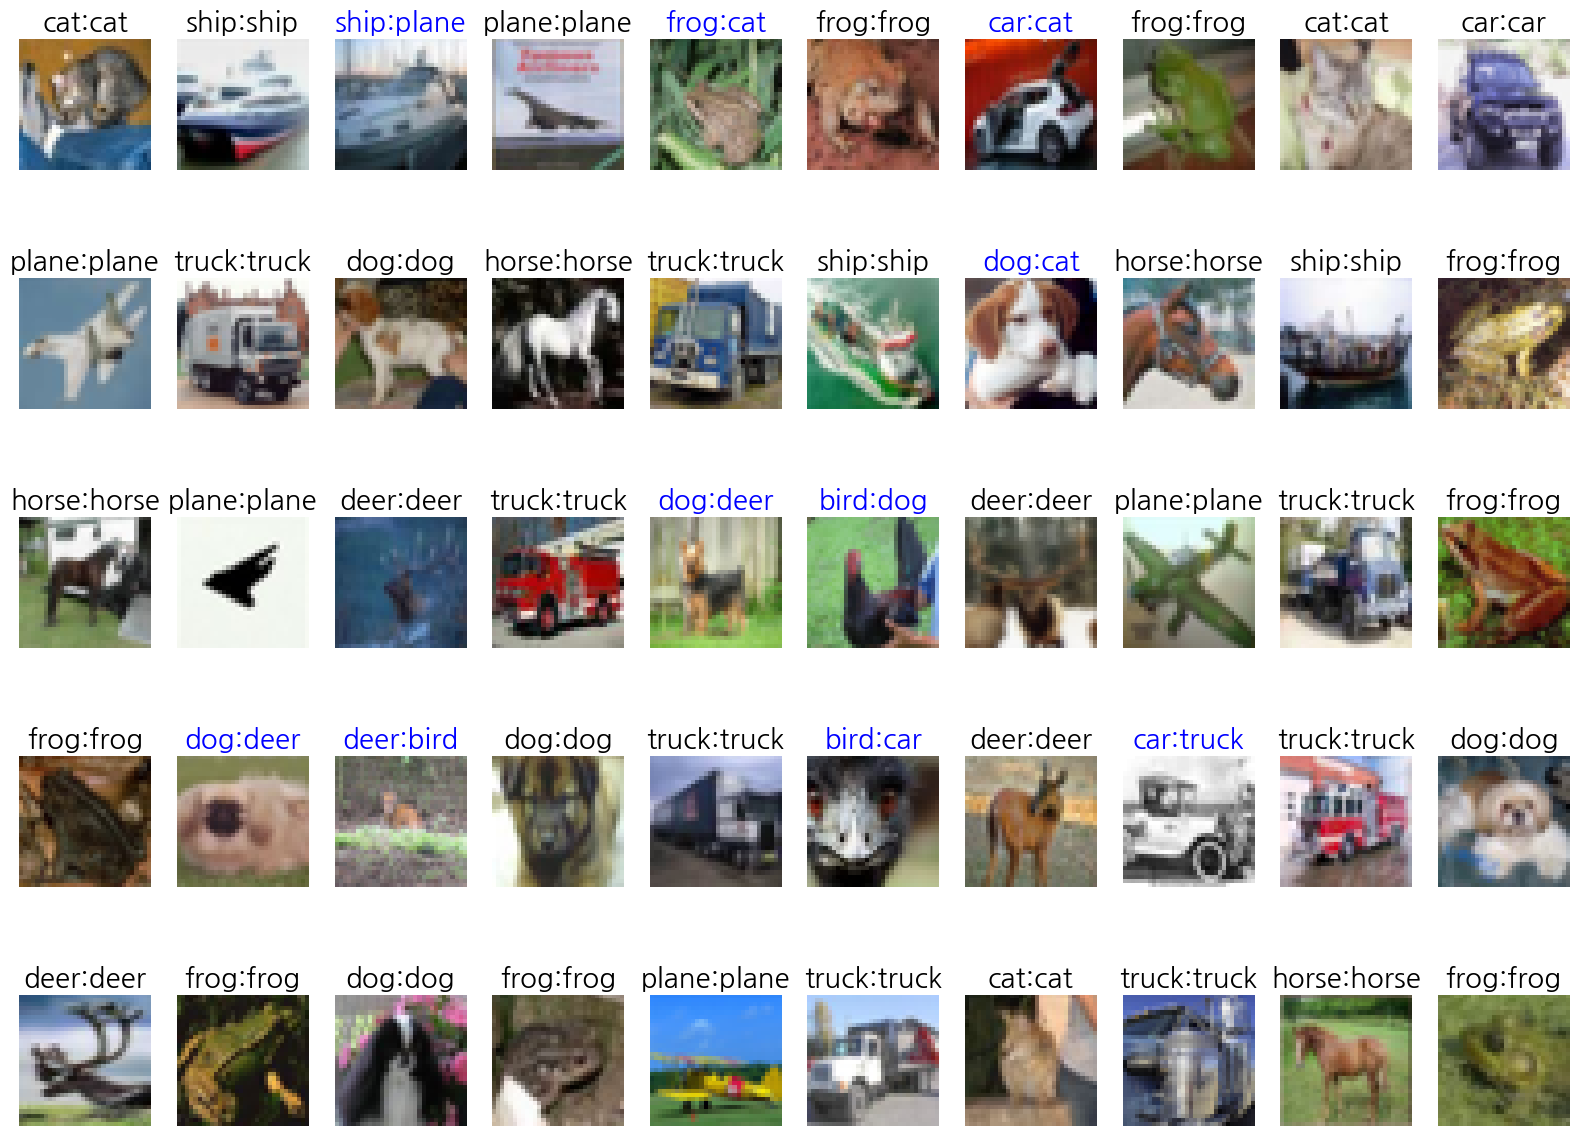

In [ ]:
# 처음 50개 데이터 표시

show_images_labels(test_loader2, classes, net, device)